In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
splits = {'train': 'IMDB_train.csv', 'validation': 'IMDB_validation.csv', 'test': 'IMDB_test.csv'}
df = pd.read_csv("hf://datasets/jahjinx/IMDb_movie_reviews/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [12]:
df.head()

,text,label
0,"Beautifully photographed and ably acted, gener...",0
1,"Well, where to start describing this celluloid...",0
2,I first caught the movie on its first run on H...,1
3,I love Umberto Lenzi's cop movies -- ROME ARME...,0
4,I generally won't review movies I haven't seen...,0


In [13]:
df.shape

(36000, 2)

In [15]:
count=df['label'].value_counts()
count

,count
label,
1,18056
0,17944


In [16]:
null_values=df.isnull().sum()

In [17]:
print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))


There are 0 missing values for text and 0 missing values for label.


<ipython-input-17-5d7a3fbb60f7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))


In [19]:
num_duplicate=df.duplicated().sum()
print('There are {} duplicate reviews present in the dataset'.format(num_duplicate))

There are 233 duplicate reviews present in the dataset


In [20]:
text=df['text']
duplicated_text=df[text.isin(text[text.duplicated()])].sort_values('text')
duplicated_text.head()

,text,label
34546,"""Three"" is a seriously dumb shipwreck movie. M...",0
12679,"""Three"" is a seriously dumb shipwreck movie. M...",0
18352,(This is a review of the later English release...,0
14315,(This is a review of the later English release...,0
813,* Some spoilers *<br /><br />This movie is som...,0


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df_copy=df.copy()

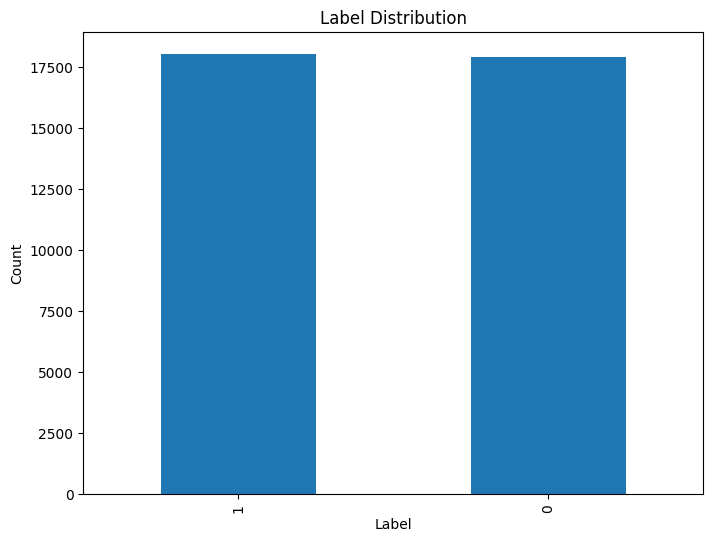

In [23]:
plt.figure(figsize=(8,6))
count.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,text,label
0,"Beautifully photographed and ably acted, gener...",0
1,"Well, where to start describing this celluloid...",0
2,I first caught the movie on its first run on H...,1
3,I love Umberto Lenzi's cop movies -- ROME ARME...,0
4,I generally won't review movies I haven't seen...,0


In [25]:
x=df['text']
y=df['label']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
y_test.shape

(7154,)

In [28]:
#Bag of words
X_train = X_train.fillna('')
X_test = X_test.fillna('')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

vectorizer=CountVectorizer()
X_train_BOW=vectorizer.fit_transform(X_train)
X_test_BOW=vectorizer.transform(X_test)

In [29]:
model_BOW=MultinomialNB()
model_BOW.fit(X_train_BOW,y_train)

MultinomialNB()

In [30]:
y_pred_BOW=model_BOW.predict(X_test_BOW)
accuracy_BOW=accuracy_score(y_test,y_pred_BOW)
print('Accuracy of the model is:',accuracy_BOW)

Accuracy of the model is: 0.8459603019289907


In [31]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_BOW)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      3514
           1       0.87      0.82      0.84      3640

    accuracy                           0.85      7154
   macro avg       0.85      0.85      0.85      7154
weighted avg       0.85      0.85      0.85      7154



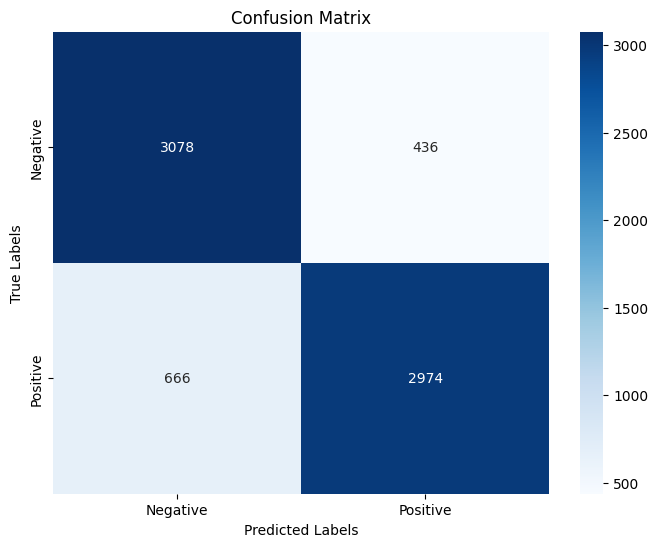

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix=confusion_matrix(y_test,y_pred_BOW)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [33]:
text="This movie is bad."
sentiment=model_BOW.predict(vectorizer.transform([text]))
print(sentiment)

[0]


In [47]:
text="The movie was good "
sentiment=model_BOW.predict(vectorizer.transform([text]))
print(sentiment)

[0]


In [36]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-01-27 10:49:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-27 10:49:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-27 10:49:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [37]:

!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [38]:
# Glove
glove_file = "glove.6B.100d.txt"
embeddings_index = {}
with open(glove_file, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

In [39]:
def get_glove_vector(text):
    words = text.split()
    vectors = [embeddings_index.get(word, np.zeros(100)) for word in words]
    return np.mean(vectors, axis=0)

In [40]:

X_train_glove = np.vstack(X_train.apply(get_glove_vector))
X_test_glove = np.vstack(X_test.apply(get_glove_vector))

In [41]:
from sklearn.linear_model import LogisticRegression
model_glove = LogisticRegression(max_iter=500)
model_glove.fit(X_train_glove, y_train)

LogisticRegression(max_iter=500)

In [42]:
y_pred_glove = model_glove.predict(X_test_glove)
accuracy_glove = accuracy_score(y_test, y_pred_glove)
print("GloVe Accuracy:", accuracy_glove)

GloVe Accuracy: 0.785434721833939


In [43]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_glove)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      3514
           1       0.79      0.78      0.79      3640

    accuracy                           0.79      7154
   macro avg       0.79      0.79      0.79      7154
weighted avg       0.79      0.79      0.79      7154



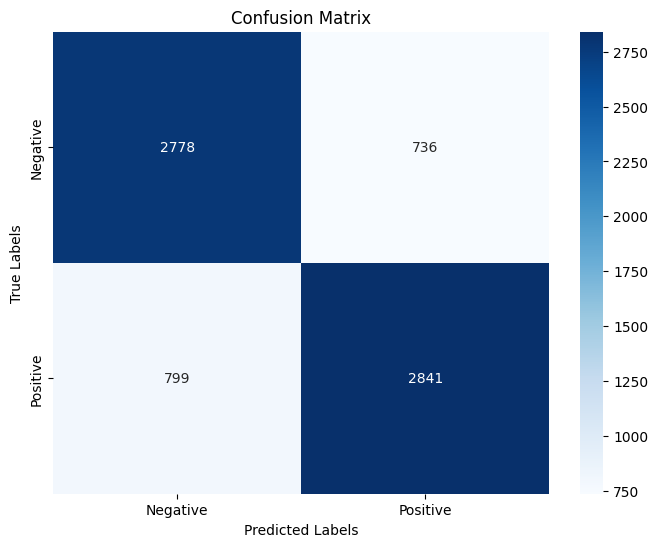

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix=confusion_matrix(y_test,y_pred_glove)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [48]:
test_text = "This movie is bad"
sentiment = model_glove.predict(get_glove_vector(test_text).reshape(1, -1))
print("Sentiment:", sentiment)

Sentiment: [0]


In [46]:
test_text = "The movie was good "
sentiment = model_glove.predict(get_glove_vector(test_text).reshape(1, -1))
print("Sentiment:", sentiment)

Sentiment: [1]


In [49]:
#word2vec
from gensim.models import Word2Vec
sentences=[review.split() for review in X_train]
word2vec_model=Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [50]:
def get_word2vec_vector(text):
    words = text.split()
    vectors = [word2vec_model.wv[word] if word in word2vec_model.wv else np.zeros(100) for word in words]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

In [51]:
X_train_word2vec=np.vstack(X_train.apply(get_word2vec_vector))
X_test_word2vec=np.vstack(X_test.apply(get_word2vec_vector))

In [52]:
model_word2vec=LogisticRegression(max_iter=200)
model_word2vec.fit(X_train_word2vec,y_train)

LogisticRegression(max_iter=200)

In [53]:
y_pred_word2vec=model_word2vec.predict(X_test_word2vec)
accuracy_word2vec=accuracy_score(y_test,y_pred_word2vec)
print('Accuracy of the word2vec model is:',accuracy_word2vec)

Accuracy of the word2vec model is: 0.8096169974839251


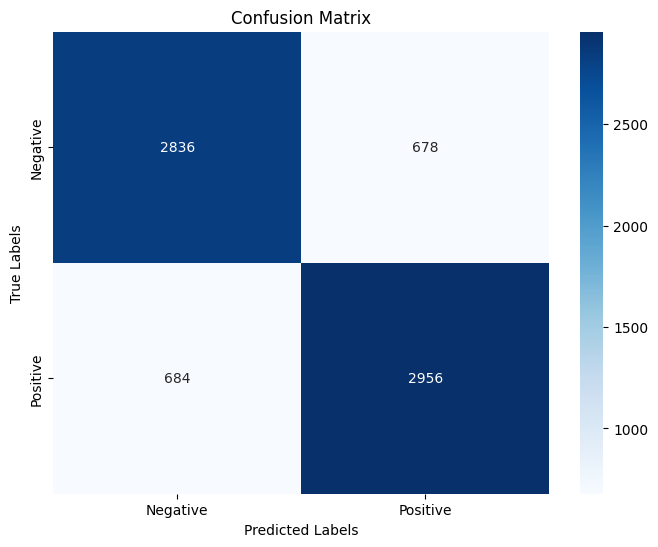

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix=confusion_matrix(y_test,y_pred_word2vec)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [55]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_word2vec)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      3514
           1       0.81      0.81      0.81      3640

    accuracy                           0.81      7154
   macro avg       0.81      0.81      0.81      7154
weighted avg       0.81      0.81      0.81      7154



In [56]:
text="This movie is bad."
sentiment = model_word2vec.predict(get_word2vec_vector(text).reshape(1, -1))
print( sentiment)


[0]


In [57]:
text='This movie is good'
sentiment = model_word2vec.predict(get_word2vec_vector(text).reshape(1, -1))
print( sentiment)

[1]


In [58]:
# BERT
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

import torch
from torch.utils.data import Dataset
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [59]:
class IMDbDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()
        self.labels = labels.tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}
        encoding['labels'] = torch.tensor(label)  # Add the label
        return encoding

In [60]:
train_dataset = IMDbDataset(X_train, y_train)
test_dataset = IMDbDataset(X_test, y_test)


In [61]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    max_steps=1000,
    weight_decay=0.01,
    logging_dir="./logs",
    evaluation_strategy="epoch",
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [64]:
!pip install transformers

In [69]:
from transformers import pipeline
import pandas as pd

# Load the dataset

df = pd.read_csv("hf://datasets/jahjinx/IMDb_movie_reviews/" + splits["train"])
# Load the sentiment-analysis pipeline with a pre-trained BERT model
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Select a small sample for testing
sample_data = df.sample(100, random_state=42)  # Take a sample of 100 rows
sample_reviews = sample_data['text'].tolist()

# Perform sentiment analysis on the sample reviews, limiting the sequence length
predictions = []
for review in sample_reviews:
    prediction = sentiment_analyzer(review, truncation=True, max_length=512) #add truncation and max_length arguments
    predictions.extend(prediction)

# Add predictions to the sample data
sample_data['predicted_sentiment'] = [pred['label'] for pred in predictions]
sample_data['predicted_score'] = [pred['score'] for pred in predictions]

# Save the results to a CSV
sample_data[['text', 'label', 'predicted_sentiment', 'predicted_score']].to_csv("sample_predictions.csv", index=False)


Device set to use cpu


In [72]:
sample_data=pd.read_csv('sample_predictions.csv')
sample_data.head()

,text,label,predicted_sentiment,predicted_score
0,It's a tale that could have taken place anywhe...,1,4 stars,0.469956
1,"I first saw this movie as a pre-teen, about th...",1,4 stars,0.622343
2,This definitely the most tension filled X-File...,1,4 stars,0.532542
3,"I'm surprised this movie is rated so highly, a...",0,3 stars,0.294039
4,This movie is finally out on DVD in Italy (com...,1,5 stars,0.472626


In [75]:
text = " This Movie is bad"
prediction = sentiment_analyzer(text)
print(f"Text: {text}")
print(f"Predicted Sentiment: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text:  This Movie is bad
Predicted Sentiment: 1 star
Confidence Score: 0.81


In [77]:
text = " I absolutely loved this movie! The story was engaging "
prediction = sentiment_analyzer(text)
print(f"Text: {text}")
print(f"Predicted Sentiment: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text:  I absolutely loved this movie! The story was engaging 
Predicted Sentiment: 5 stars
Confidence Score: 0.89


In [78]:
text = " I really didn’t enjoy this movie. "
prediction = sentiment_analyzer(text)
print(f"Text: {text}")
print(f"Predicted Sentiment: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text:  I really didn’t enjoy this movie. 
Predicted Sentiment: 2 stars
Confidence Score: 0.51
